Ensin, tarvitut kirjastot pitää imporata. Tätä workshopia varten tarvitsemme pandas, numpy ja matplotlib nimiset kirjastot.


In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

## Datan importtaaminen ja datatyypit

Seuraavaksi haluamme lukea datan sisältävän csv-tiedoston sisään.

Tässä esimerkissä käytämme Titanic datasettiä. Se on alunperin Kagglesta (https://www.kaggle.com/c/titanic/data) ja tiedostossa on seuraavat sarakkeet:
* Matkustajatunnus (*passengerId*)
* Tieto selviytymisestä (*survival*)
* Lippuluokka (*pclass*)
* Matkustajan nimi (*name*)
* Sukupuoli (*sex*)
* Ikä (*age in years, if < 1, then presented as 0.X*)
* Sisarusten ja puolisoiden määrä laivalla (*sibSp*)
* Lasten ja vanhempien määrä laivalla (*parch*)
* Lipun numero (*ticket*)
* Matkustajamaksu (*fare*)
* Hytin numero (*cabin*)
* Laivaannoususatama (*embarked*) jossa C = Cherbourg, Q = Queenstown, S = Southampton

Minkä tyyppistä (int, float, object, date, boolean) tietoa nämä sarakkeet voisi sisältää?

Lue csv-tiedosto ja tarkasta, ovatko datatyypit oikein.

In [31]:
df=pd.read_csv('train.csv')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')

df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

## Datan tutkiminen

Haluamme ensin tarkastaa, kuinka suuri datasetti on. Tähän voidaan käyttää shape-funktiota.

In [33]:
df.shape

(891, 12)

Tämä tarkoittaa siis, että datassa on 891 riviä ja 12 saraketta. tarkastellaan esimerkiksi ensimmäistä 10 riviä, jotta saamme ensisilmäyksen siitä, millaisia arvoja datasetti sisältää.

In [34]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Millaisia asioita tästä huomataan?
* Mitä suurempi matkustusluokka, sitä alempi hinta
* Datasetti sisältää puuttuvia arvoja (NaN) ikä- ja hyttisarakkeissa.

Tämä ei kuitenkaan anna kattavaa kuvaa, ja haluamme ymmärtää koko datasettiä. Tätä varten käytämme useita funktioita, riipuen siitä minkä tyyppistä dataa sarakkeet sisältävät:
* Kategorisille muuttujille haluamme nähdä kaikki mahdolliset uniikit arvot (etenkin jos niitä ei ole kovin montaa). Sama koskee numeerisia, diskreettejä arvoja. Näiden kahden kategorian alla ovat Pclass, Age, SibSp, Parch ja Embarked sarakkeet.
* Jatkuville numeerisille muuttujille emme halua tarkastella kaikkia arvoja, vaan jakaumaa. Tämän tyyppinen sarake on Fare.
* Boolean (totuusarvo) tyyppiset sarakkeet voivat esittää numeroina, ja ne voivat saada vain arvon 0 tai 1. Tämän tyyppistä saraketta ei siis tarvitse tarkastella erikseen, jos ei ole epävarma siitä, onko kyseessä totuusarvo.

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tarkastellaan ensin kategoristen/diskreettisten sarakkeiden uniikkeja arvoja ja niiden määriä:

In [36]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [37]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [38]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Seuraavaksi voidaan tarkastella jatkuvan muuttujan jakaumaa:

In [40]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Yllä olevat asiat auttavat ymmärtämään dataa. Seuraavaksi selvitämme, kuinka paljon datan eri sarakkeissa on puuttuvia arvoja:

In [41]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

687 puuttuvaa arvoa Cabin-sarakkeessa, eli lähes 80% kaikista riveistä. Toisaalta, sarakkeessa oleva tieto ei ole välttämättä tarjoa meille hyödyllistä informaatiota, joten tässä tapauksessa se on ok. Kyseinen sarake on myös haastava, jos meillä ei ole tietoa laivan kaikista hyteistä ja niiden tunnuksista.

Embarked-sarakkeessa on kaksi puuttuvaa arvoa ja Age-sarakkeessa on 177 puuttuvaa arvoa. Niille täytyy tehdä jotain.

## Datan siivoaminen

Tässä vaiheessa viimeistään on hyvä tarkistaa, että kaikissa sarakkeissa on oikea datatyyppi. Kategoriset, tekstuaaliset sarakkeet on hyvä muuttaa tässä vaiheessa kategoria-tyyppisiksi suoritustehokkuuden lisäämiseksi. Tässä datasetissä on kaksi sellaista saraketta: ikä ja laivaannoususatama.

In [42]:
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')

df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

Sitten puuttuvat arvot. Age-sarake kuulostaa tärkeältä, eikä Embarked-sarakettakaan voida vielä täysin varmasti rajata pois. Puuttuville arvoille pitää siis tehdä jotain. Mitä niille voisi tehdä? Voisimme pudottaa pois rivit, joilta puuttuu arvoja. Toisaalta näitä rivejä on pahimmillaan 179, eikä datasetti alunperinkään ole kovin suuri, joten se ei välttämättä ole kovin hyvä ratkaisu.

Tarkastellaan ensin lähemmin Embarked-saraketta, ja miten matkustajat ovat jakautuneet eri satamien välille. 
Haluamme siis ensin laskea, kuinka monta matkustajaa nousi kyytiin per satama, ja sitten muodostaa siitä 
Tarkastelu tehdään plotlyn avulla:

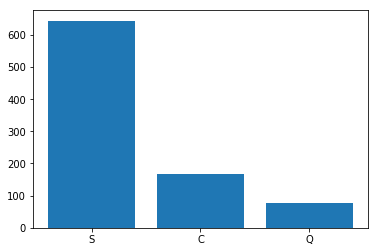

In [43]:
grouped_data=df['Embarked'].value_counts()

grouped_dict=grouped_data.to_dict()

plt.bar(grouped_dict.keys(), grouped_dict.values())
plt.show()

Tässä tapauksessa Southampton on selkeästi yleisin. Voimme varmaankin merkitä kahdelle riville sen laivaannoususatamaksi, ilman että se vaikuttaa lopputulokseen. Valitaan siis täyttöstategiaksi moodi ja varmistetaan, että se ei sisällä enää puuttuvia arvoja.

In [44]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Embarked'].isna().sum()

0

Voisimme myös täyttää puuttuvat arvot perustuen eri arvojen jakaumaan:

In [45]:
s=df['Embarked'].value_counts(normalize=True)

missing = df['Embarked'].isnull()

df.loc[missing,'Embarked'] = np.random.choice(s.index, size=missing.sum(),p=s.values)

Seuraavaksi vuorossa on ikä. 

In [46]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [47]:
df['Age'].median()

28.0

Tämä ei todennäköisesti vielä auta jakauman hahmottamisessa. Piirretään arvoista histogrammi.

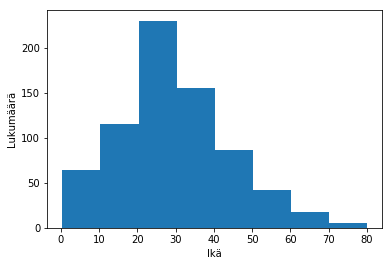

In [48]:
plt.xlabel('Ikä')
plt.ylabel('Lukumäärä')
plt.hist(df['Age'].dropna(), bins=8)
plt.show()

Helppo ratkaisu on käyttää keskiarvoa tai mediaania. Puuttuvien numeeristen arvojen täyttämiseen voisi käyttää paljon hienostuneempiakin ratkaisuja, mutta tässä tapauksessa käytämme mediaania. Histogrammista näämme, että arvot ovat melko normaalijakautuneet, joten tässä tapauksessa se on riittävän hyvä.

In [49]:
df['Age']=df['Age'].fillna(df['Age'].median())

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Seuraavaksi tehdään vielä operaatiot, joiden tarkoituksena on siivota datasta turhat sarakkeet pois ja muuttaa kaikki data numeeriseksi, koska koneoppimisalgoritmit käsittelevät usein numeerista dataa paremmin.

Tärkeiden sarakkeiden haarukoimiseen on olemassa hienoja menetelmiä, mutta tässä tapauksessa alkukarsinnan voi suorittaa miettimällä sarakkeiden merkitystä selviämisen kannalta. Todennäköisiä hyviä ehdokkaita ovat esimerkiksi tekstuaaliset muuttujat, jotka eivät ole kategorioita. 
Tällaisia ovat esimerkiksi nimi ja hytti. Hytti voisi teoriassa olla tärkeä, jos mukana ei olisi tietoa lipun hinnasta ja lippuluokasta. Lisäksi kyseisestä sarakkeesta puuttuu aivan liian paljon arvoja, että sitä voisi käyttää.

In [50]:
df=df.drop(['Name', 'Cabin'], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Lisäksi meillä on kaksi saraketta, jotka tarjoavat käytännössä samaa informaatiota: matkustajahinta ja lippuluokka. Ne viestivät sosioekonomisesta asemasta ja siitä, missä päin laivaa hytti sijaitsi. Voimme siis melko turvallisin mielin poistaa matkustajahinta-sarakkeenkin.

In [51]:
df=df.drop(['Fare'], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Embarked'],
      dtype='object')

Näiden lisäksi tunnisteet eivät yleensä tuo informaatiota, ellei kyse ole kategorian tunnisteesta. Siis esimerkiksi tuotteen tunniste voi olla kauppadataa käyttäessä olla tärkeä, mutta laivamatkustajan tunniste ei todennäköisesti kerro meille mitään uutta, koska niitä käytetään matkustajan identifioimiseen datasta. Samanlainen tunniste on lipun tunniste.

In [52]:
df=df.drop(['PassengerId','Ticket'], axis=1)

In [53]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

Jäljelle jäivät siis sarakkeet
* selviytynyt 
* hyttiluokka 
* sukupuoli
* ikä 
* sisarusten/puolisoiden määrä laivalla 
* lasten/vanhempien määrä laivalla
* laivaannoususatama

Näistä tekstuaalisia ovat sukupuoli ja laivaannoususatama. Tehdään näistä seuraavaksi numeerisia get_dummies -funktion avulla.

In [54]:
df=pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [55]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


Nyt data on saatu siihen muotoon, että siitä voitaisiin muodostaa koneoppimismalli.